Sakshi Kulshreshtha: 16BCE1198

Bank Dataset: using MLPClassifier library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
banknote=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")

In [3]:
banknote.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [4]:
banknote=banknote.round()

In [5]:
banknote.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,5.0,8.0,-2.0,-1.0,0
1,4.0,-3.0,2.0,0.0,0
2,3.0,10.0,-4.0,-4.0,0
3,0.0,-4.0,5.0,-1.0,0
4,4.0,10.0,-4.0,-3.0,0


In [6]:
X=banknote.values[:,0:4]
Y=banknote.values[:,4]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
mlp=MLPClassifier(hidden_layer_sizes=(4),max_iter=500)

In [9]:
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
prediction=mlp.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(Y_test,prediction))
print("\nClassification Report:\n",classification_report(Y_test,prediction))
print("Accuracy: ",accuracy_score(Y_test,prediction)*100,'%')

Confusion Matrix:
 [[231   2]
 [  0 179]]

Classification Report:
              precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       233
        1.0       0.99      1.00      0.99       179

avg / total       1.00      1.00      1.00       412

Accuracy:  99.5145631068 %


MNIST Dataset: without using library

In [24]:
import numpy as np
from scipy.special import expit
import sys
class NeuralNetMLP(object):
    def __init__(self, n_output, n_features, n_hidden=30,l1=0.0, l2=0.0, epochs=500, eta=0.001,alpha=0.0, decrease_const=0.0, shuffle=True,minibatches=1, random_state=None):
        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
    def _encode_labels(self, y, k):
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot
    def _initialize_weights(self):
        w1 = np.random.uniform(-1.0, 1.0,size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0,size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2
    def _sigmoid(self, z):
        return expit(z)
    def _sigmoid_gradient(self, z):
        sg = self._sigmoid(z)
        return sg * (1 - sg)
    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new
    def _feedforward(self, X, w1, w2):
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3
    def _L2_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2))
    def _L1_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() + np.abs(w2[:, 1:]).sum())
    def _get_cost(self, y_enc, output, w1, w2):
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost
    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))
        return grad1, grad2
    def predict(self, X):
        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred
    def fit(self, X, y, print_progress=False):
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)
        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)
        for i in range(self.epochs):
            self.eta /= (1 + self.decrease_const*i)
            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()
            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_data = X_data[idx], y_data[idx]
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:
                a1, z2, a2, z3, a3 = self._feedforward(X[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],output=a3,w1=self.w1,w2=self.w2)
                self.cost_.append(cost)
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,a3=a3, z2=z2,y_enc=y_enc[:, idx],w1=self.w1,w2=self.w2)
                delta_w1, delta_w2 = self.eta * grad1,self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2
        return self

In [25]:
nn = NeuralNetMLP(n_output=10,n_features=X_train.shape[1],n_hidden=50,l2=0.1,l1=0.0,epochs=1000,eta=0.001,alpha=0.001,decrease_const=0.00001,shuffle=True,minibatches=50,random_state=1)

In [26]:
import os
import struct
import numpy as np
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'% kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)
    return images, labels

In [27]:
X_train, y_train = load_mnist('E:\SEM 5\MACHINE LEARNING\LAB\8- Multi Layer Perceptron', kind='train')
X_test, y_test = load_mnist('E:\SEM 5\MACHINE LEARNING\LAB\8- Multi Layer Perceptron', kind='t10k')

In [28]:
print('Rows: %d, columns: %d'% (X_train.shape[0], X_train.shape[1]))
print('Rows: %d, columns: %d'% (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


In [29]:
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

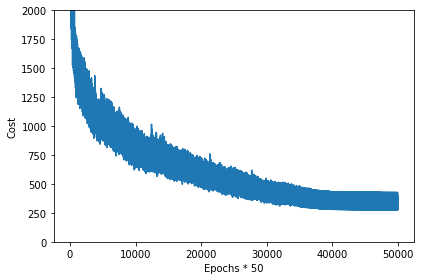

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.show()

In [32]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

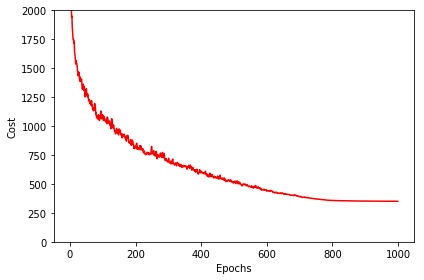

In [33]:
plt.plot(range(len(cost_avgs)),cost_avgs,color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [34]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 97.82%


In [35]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 96.00%


OULAD Dataset: using library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("E:/SEM 5/MACHINE LEARNING/LAB/Dataset-OULAD/StudentInfoPreprocessed.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3])
df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4])
df.iloc[:,5] = labelencoder.fit_transform(df.iloc[:,5])
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6])
df.iloc[:,7] = labelencoder.fit_transform(df.iloc[:,7])
df.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10])
df.iloc[:,11] = labelencoder.fit_transform(df.iloc[:,11])

In [4]:
X=np.array(df.iloc[:,[5,9,10,11]])
Y=np.array(df.iloc[:,-1])

In [6]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
mlp=MLPClassifier(hidden_layer_sizes=(3),max_iter=250)

In [9]:
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=250, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
prediction=mlp.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(Y_test,prediction))
print("\nClassification Report:\n",classification_report(Y_test,prediction))
print("Accuracy: ",accuracy_score(Y_test,prediction)*100,'%')

Confusion Matrix:
 [[ 931    0    0    0]
 [   0 2080    0    0]
 [   0    0 3730    0]
 [   0    0    0 3037]]

Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       931
          1       1.00      1.00      1.00      2080
          2       1.00      1.00      1.00      3730
          3       1.00      1.00      1.00      3037

avg / total       1.00      1.00      1.00      9778

Accuracy:  100.0 %


Analysis of Accuracy Score w.r.t. Change in No. of Hidden Layers and Iterations

S.No.	No. of Hidden Layers	No. of Iterations	        Accuracy Score
 1	              1                	100	            Optimisation hasn't converged yet
 2             	  1             	200                    	  90.48%
 3	              1	                500	                     100.00%
 4	              2	                200                    	 100.00%
 5	              3	                200	            Optimisation hasn't converged yet
 6	              3             	300	                     100.00%
 7            	  4	                300	                     100.00%